In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
from PIL import Image

data = fetch_lfw_people(min_faces_per_person=30, resize=1)
images = data.images

X = data.data         # shape: (n_samples, h*w)
images = data.images  # shape: (n_samples, h, w)
target = data.target  # 라벨
names = data.target_names

# random 1000 datasamples
np.random.seed(1)
indices = np.random.choice(len(X), size=1000, replace=False)

data = Bunch(
    data = data.data[indices],
    images = data.images[indices],
    target = data.target[indices],
    target_names = data.target_names
)

In [ ]:
print(len(data.data))
print(data.data[0])

1000
[0.32941177 0.41045752 0.5019608  ... 0.28496733 0.15686275 0.1254902 ]


image reduction using SVD

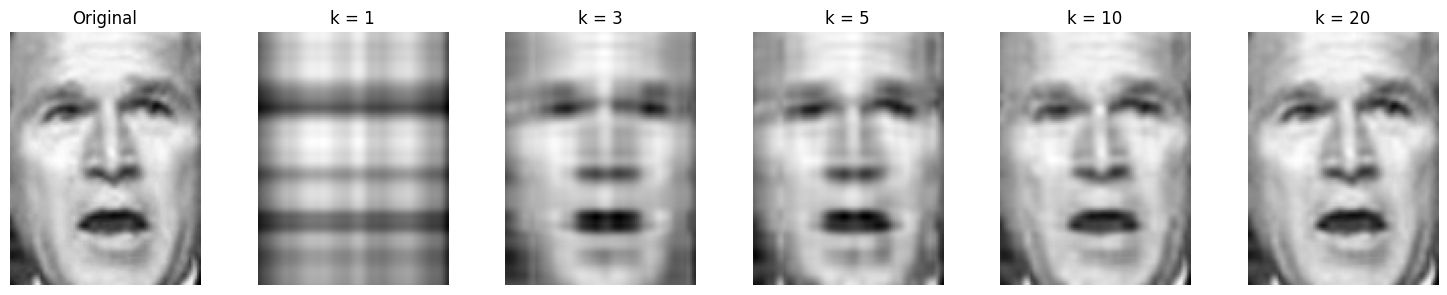

In [ ]:
image = data.images[0]
U, S, VT = np.linalg.svd(image, full_matrices=False)

def svd_reconstruct(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k

# ----------------------------
ks = [1, 3, 5, 10, 20]
fig, axes = plt.subplots(1, len(ks)+1, figsize=(15, 3))

# original
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# reconstructed
for i, k in enumerate(ks):
    img_k = svd_reconstruct(U, S, VT, k)
    axes[i+1].imshow(img_k, cmap='gray')
    axes[i+1].set_title(f"k = {k}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()


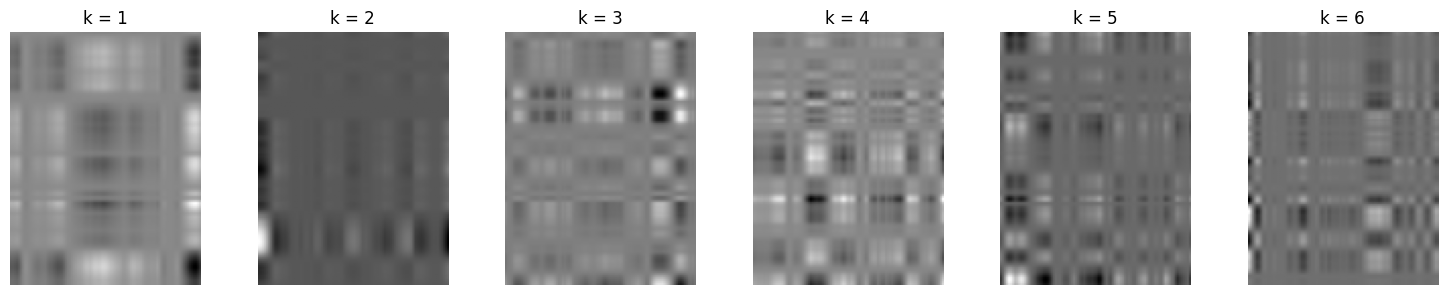

In [ ]:
image = data.images[1]
U, S, VT = np.linalg.svd(image, full_matrices=False)

def svd_reconstruct(U, S, VT, k):
    U_k = U[:, k]
    VT_k = VT[k, :]
    return U_k.reshape(-1, 1) @ VT_k.reshape(1,-1)

# ----------------------------
ks = [1, 2, 3, 4, 5, 6]
fig, axes = plt.subplots(1, len(ks), figsize=(15, 3))


for i, k in enumerate(ks):
    img_k = svd_reconstruct(U, S, VT, k)
    axes[i].imshow(img_k, cmap='gray')
    axes[i].set_title(f"k = {k}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print(S[5])

2.4528742


Image mean

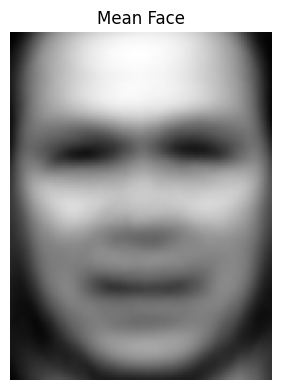

In [ ]:
n_samples, h, w = images.shape
X = data.data[:1000,:]

mean_face_flat = np.mean(X, axis=0)
X_centered = X - mean_face_flat

mean_face = mean_face_flat.reshape(h, w)
centered_example = X_centered[0].reshape(h, w)

plt.figure(figsize=(6, 4))
plt.imshow(mean_face, cmap='gray')
plt.title("Mean Face")
plt.axis('off')
plt.tight_layout()
plt.show()

PCA using Mean face

In [ ]:
n_samples, h, w = images.shape
X = data.data

mean_face_flat = np.mean(X, axis=0)
X_centered = X - mean_face_flat

U, S, VT = np.linalg.svd(X_centered, full_matrices=False)

weights_pc1 = U[:, 0] * S[0]
weights_pc2 = U[:, 1] * S[1]

print(f"S[0]: {S[0]:.2f}, 가중치[0] 범위: {weights_pc1.min():.2f} ~ {weights_pc1.max():.2f}")
print(f"S[1]: {S[1]:.2f}, 가중치[1] 범위: {weights_pc2.min():.2f} ~ {weights_pc2.max():.2f}")

S[0]: 264.23, 가중치[0] 범위: -21.49 ~ 28.93
S[1]: 188.14, 가중치[1] 범위: -23.30 ~ 17.47


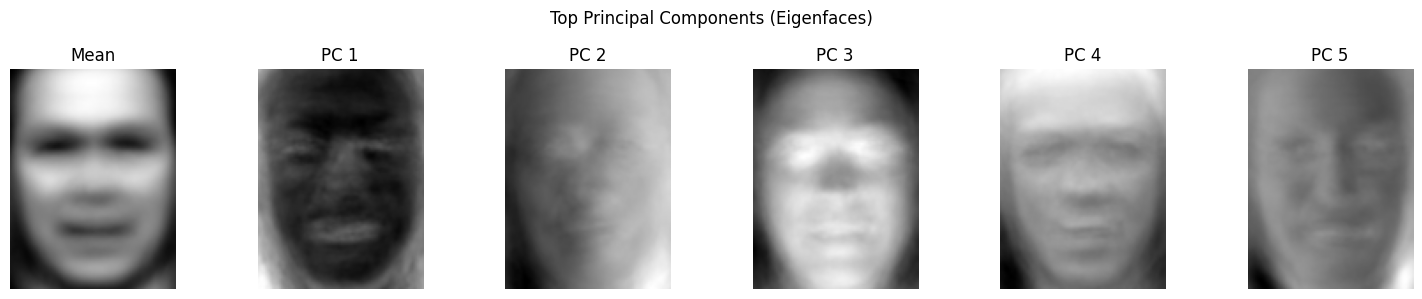

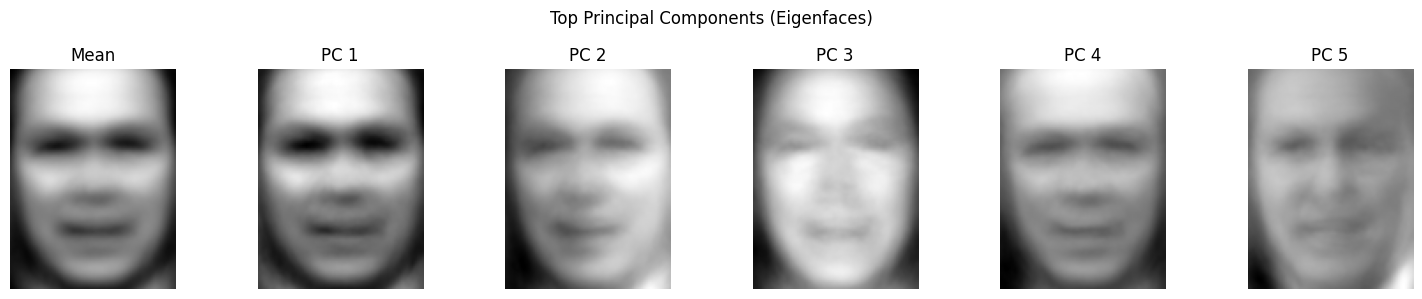

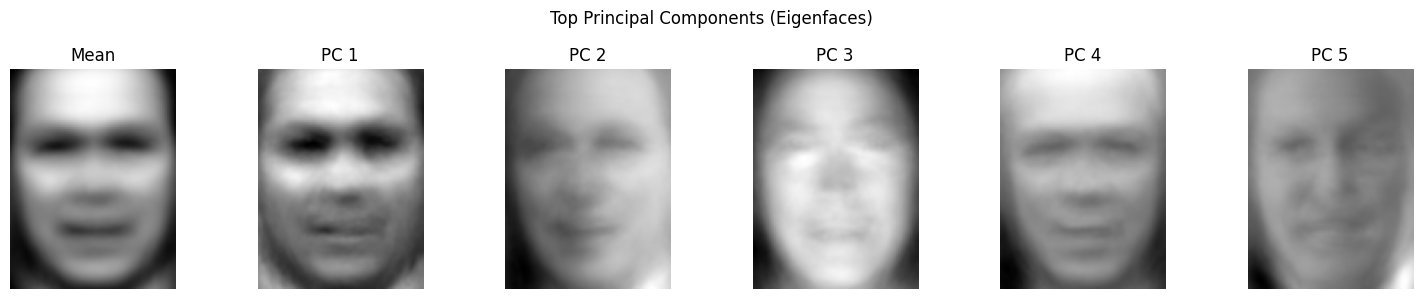

In [ ]:
# ----------------------------
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

# mean face
axes[0].imshow(mean_face, cmap='gray')
axes[0].set_title("Mean")
axes[0].axis('off')

k = 5  # 상위 주성분 개수
eigenfaces = VT[:k].reshape((k, h, w))

for i in range(k):
    ax = axes[i+1]
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Principal Components (Eigenfaces)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

####
axes[0].imshow(mean_face, cmap='gray')
axes[0].set_title("Mean")
axes[0].axis('off')

for i in range(k):
    ax = axes[i+1]
    ax.imshow(10*eigenfaces[i]+mean_face, cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Principal Components (Eigenfaces)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 6, figsize=(15, 3))
####
axes[0].imshow(mean_face, cmap='gray')
axes[0].set_title("Mean")
axes[0].axis('off')

for i in range(k):
    ax = axes[i+1]
    ax.imshow(20*eigenfaces[i]+mean_face, cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Principal Components (Eigenfaces)")
plt.tight_layout()
plt.show()

In [ ]:
print(VT.shape)

(1000, 11750)


In [ ]:
n_principal = 50
features = X_centered@VT[:n_principal, :].T
recon = features @ VT[:n_principal, :] + mean_face_flat
print(recon[0])

[0.52938056 0.5159461  0.51417315 ... 0.40301046 0.35614008 0.3234019 ]


[[0.23137255 0.23006536 0.22614379 ... 0.13202615 0.12941177 0.11764706]
 [0.21830066 0.21568628 0.21437909 ... 0.13071896 0.1267974  0.11372549]
 [0.21045752 0.20522876 0.2        ... 0.11372549 0.11764706 0.1254902 ]
 ...
 [0.59607846 0.5934641  0.59738564 ... 0.45228758 0.40130723 0.36993468]
 [0.59607846 0.59607846 0.59738564 ... 0.42483664 0.3882353  0.3882353 ]
 [0.59607846 0.59607846 0.59738564 ... 0.37908497 0.38169935 0.4248366 ]]


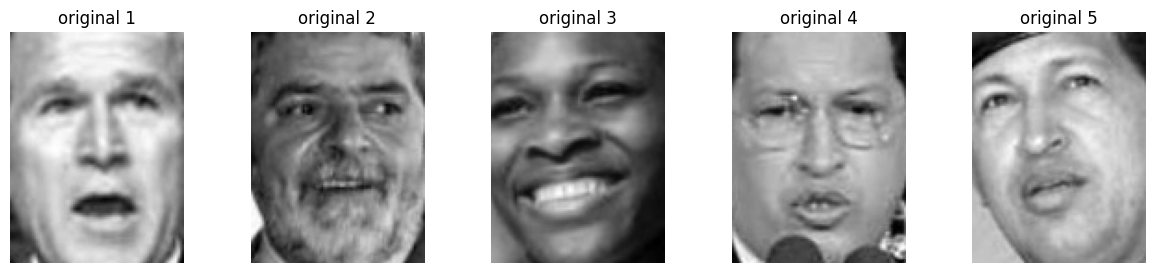

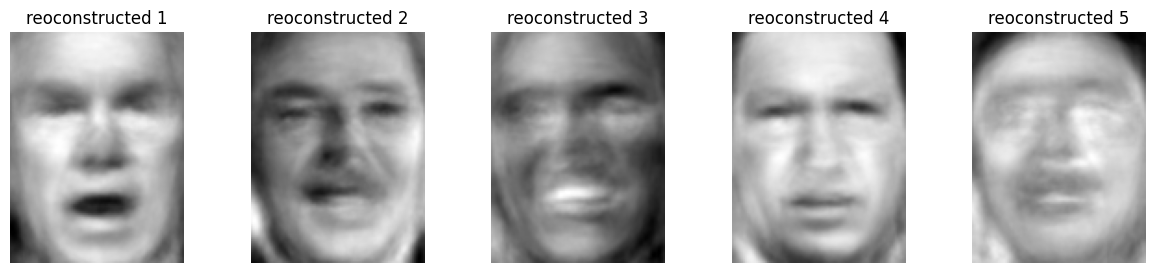

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

print(X[i].reshape(h,w))
for i in range(5):
    ax = axes[i]
    ax.imshow(X[i].reshape(h,w), cmap='gray')
    ax.set_title(f"original {i+1}")
    ax.axis('off')
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    ax = axes[i]
    ax.imshow(recon[i].reshape(h,w), cmap='gray')
    ax.set_title(f"reoconstructed {i+1}")
    ax.axis('off')

plt.show()

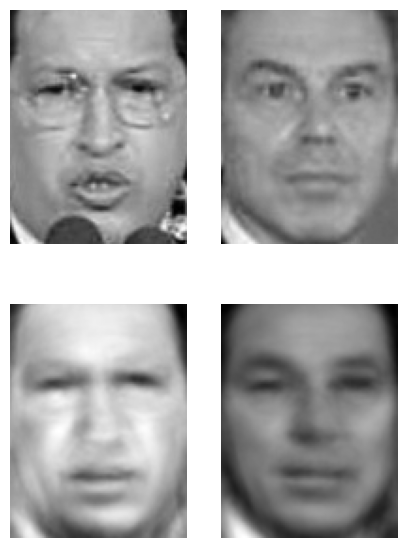

In [ ]:
index = 3

z = X_centered[index, :]@VT[:n_principal, :].T

def find_nearest_index(X_features, z_query):
    distances = np.linalg.norm(X_features - z_query, axis=1)
    sorted_indices = np.argsort(distances)
    second_idx = sorted_indices[1]
    return second_idx, distances[second_idx]

nearest_idx, dist = find_nearest_index(features, z)

fig, axes = plt.subplots(2, 2, figsize=(5, 7))

ax = axes[0, 0]
ax.imshow(X[index].reshape(h,w), cmap='gray')
ax.axis('off')

ax = axes[0, 1]
ax.imshow(X[nearest_idx].reshape(h,w), cmap='gray')
ax.axis('off')

ax = axes[1, 0]
ax.imshow(recon[index].reshape(h,w), cmap='gray')
ax.axis('off')

ax = axes[1,1]
ax.imshow(recon[nearest_idx].reshape(h,w), cmap='gray')
ax.axis('off')
plt.show()